In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/DATA_Dhruvi/Courses/Code Clause/archive (2)/train.csv", encoding= 'unicode_escape')

In [4]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
data.shape

(27481, 10)

In [6]:
data.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [7]:
# Removing the textID (we won't use it for the analysis)
data.drop(["textID"],axis=1,inplace=True)
data.head()

,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [8]:
# Removing the Time,Age,country,population,area and density (we won't use it for the analysis)
data.drop(["Time of Tweet"],axis=1,inplace=True)
data.drop(["Age of User"],axis=1,inplace=True)
data.drop(["Country"],axis=1,inplace=True)
data.drop(["Population -2020"],axis=1,inplace=True)
data.drop(["Land Area (Km²)"],axis=1,inplace=True)
data.drop(["Density (P/Km²)"],axis=1,inplace=True)
data.drop(["selected_text"],axis=1,inplace=True)
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

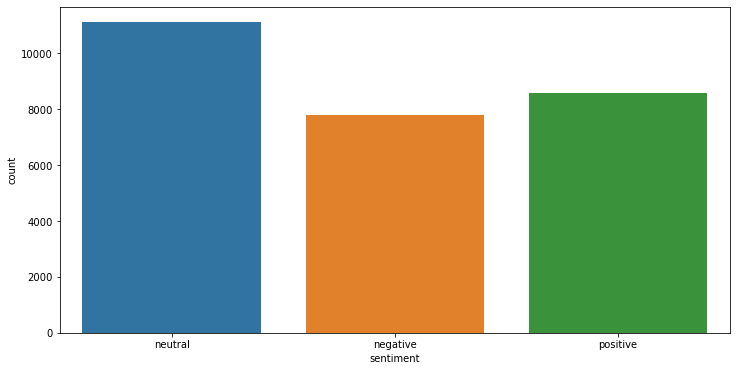

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=data)

In [10]:
df = data.dropna(axis=0, how="any")
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [11]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [12]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [13]:
# Convert to lowercase
df['text'] = df['text'].str.lower()
df.head()

C:\Users\Dhruvi\AppData\Local\Temp/ipykernel_14724/2725660901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


,text,sentiment
0,"i`d have responded, if i were going",neutral
1,sooo sad i will miss you here in san diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"sons of ****, why couldn`t they put them on t...",negative


In [14]:
# Define the function to remove the punctuation
import string 

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the dataframe
df['text'] = df['text'].apply(remove_punctuations)
df.head()

C:\Users\Dhruvi\AppData\Local\Temp/ipykernel_14724/1091039700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_punctuations)


,text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhruvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Removing new stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
newStopWords = ['said','us','also','could','would','like','told','via','get','know','want','well','need','say','look','give','took','saying','many','still','think','going','become','put','might','for','got','use','go','may','much','keep','saying','let','see','make']
stop.extend(newStopWords)

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhruvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Dhruvi\AppData\Local\Temp/ipykernel_14724/2035874250.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


,text,sentiment
0,id responded,neutral
1,sooo sad miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons couldnt releases already bought,negative


In [32]:
!pip install wordcloud

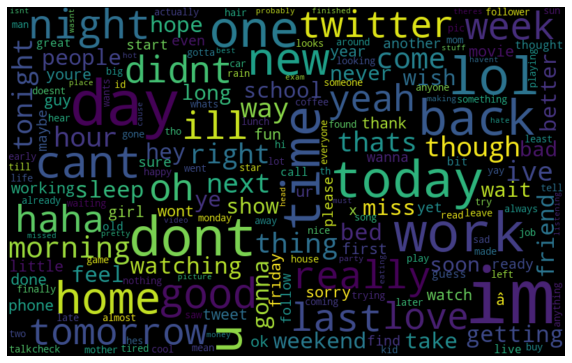

In [33]:
#world cloud for neutral sentiment
from wordcloud import WordCloud
fake_data = df[df["sentiment"] == "neutral"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
import regex as re
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')

In [19]:
def clean_up_pipeline(sentence):
    cleaning_data = [ remove_hyperlink,
                      replace_newline,
                      remove_number,
                      remove_whitespace,
                     ]
    for func in cleaning_data:
        
        sentence = func(sentence)
    return sentence

In [20]:
df['text'] = df['text'].apply(clean_up_pipeline)
df.head()

C:\Users\Dhruvi\AppData\Local\Temp/ipykernel_14724/753124522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_up_pipeline)


,text,sentiment
0,id responded,neutral
1,sooo sad miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons couldnt releases already bought,negative


In [21]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(df = df_frequency, x = "Word", y = "Frequency", color = 'red')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [22]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['text'], df.sentiment, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cnf_matrix = confusion_matrix(prediction, y_test)
print(cnf_matrix)

[[ 897  297   63]
 [ 589 1666  419]
 [  86  273 1206]]


In [26]:
print("Precision: {:.2f}%".format(100 * precision_score(prediction, y_test, average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(prediction, y_test, average='micro')))
print("F1 Score: {:.2f}%".format(100 * f1_score(prediction, y_test, average='micro')))

Precision: 68.58%
Recall: 68.58%
F1 Score: 68.58%


In [28]:
# Vectorizing and applying TF-IDF on Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 59.28%


In [29]:
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 63.14%


In [30]:
 # Vectorizing and applying TF-IDF for Logistic Regression
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 68.58%


C:\Users\Dhruvi\Untitled Folder 1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Vectorizing and applying TF-IDF for Random Forect Classifier
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 69.38%
